In [3]:
import csv
import matplotlib as plt

In [4]:
import pandas as pd
import numpy as np

In [5]:
import ta
import yfinance as yf

In [6]:
fpt = yf.download('FPT.VN', start='2021-01-01')

fpt.tail(10)

/var/folders/z7/r_tqdn6d1hg1j1gn1qbc2qn40000gn/T/ipykernel_27963/1116123087.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fpt = yf.download('FPT.VN', start='2021-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,FPT.VN,FPT.VN,FPT.VN,FPT.VN,FPT.VN
Date,,,,,
2025-07-11,110086.953125,111304.351562,108347.828125,108695.648438,12676173
2025-07-14,110521.742188,111217.390625,108695.648438,110608.695312,8923096
2025-07-15,109565.218750,111130.437500,109565.218750,110086.953125,6550566
2025-07-16,109826.085938,110434.781250,108782.609375,110173.914062,5838606
2025-07-17,110434.781250,112260.867188,109565.218750,110173.914062,10387301
2025-07-18,109565.218750,111304.351562,109565.218750,111304.351562,8065531
2025-07-21,110300.000000,112400.000000,110300.000000,112400.000000,8815279
2025-07-22,112100.000000,112200.000000,108700.000000,110300.000000,7127237


In [7]:
# Ensure 'Close' is a 1D Series
close_series = fpt['Close'].squeeze()

macd_object = ta.trend.MACD(close_series)
fpt['MACD'] = macd_object.macd()
fpt['MACD_Signal'] = macd_object.macd_signal()
fpt['MACD_Diff'] = macd_object.macd_diff()
fpt.tail()

Price,Close,High,Low,Open,Volume,MACD,MACD_Signal,MACD_Diff
Ticker,FPT.VN,FPT.VN,FPT.VN,FPT.VN,FPT.VN,,,
Date,,,,,,,,
2025-07-18,109565.21875,111304.351562,109565.21875,111304.351562,8065531,2273.515301,1901.120207,372.395094
2025-07-21,110300.00000,112400.000000,110300.00000,112400.000000,8815279,2272.402668,1975.376700,297.025968
2025-07-22,112100.00000,112200.000000,108700.00000,110300.000000,7127237,2389.224364,2058.146232,331.078131
2025-07-23,111800.00000,112800.000000,111300.00000,112300.000000,4825624,2429.592081,2132.435402,297.156679
2025-07-24,111100.00000,112100.000000,110800.00000,112000.000000,6635334,2377.691096,2181.486541,196.204555


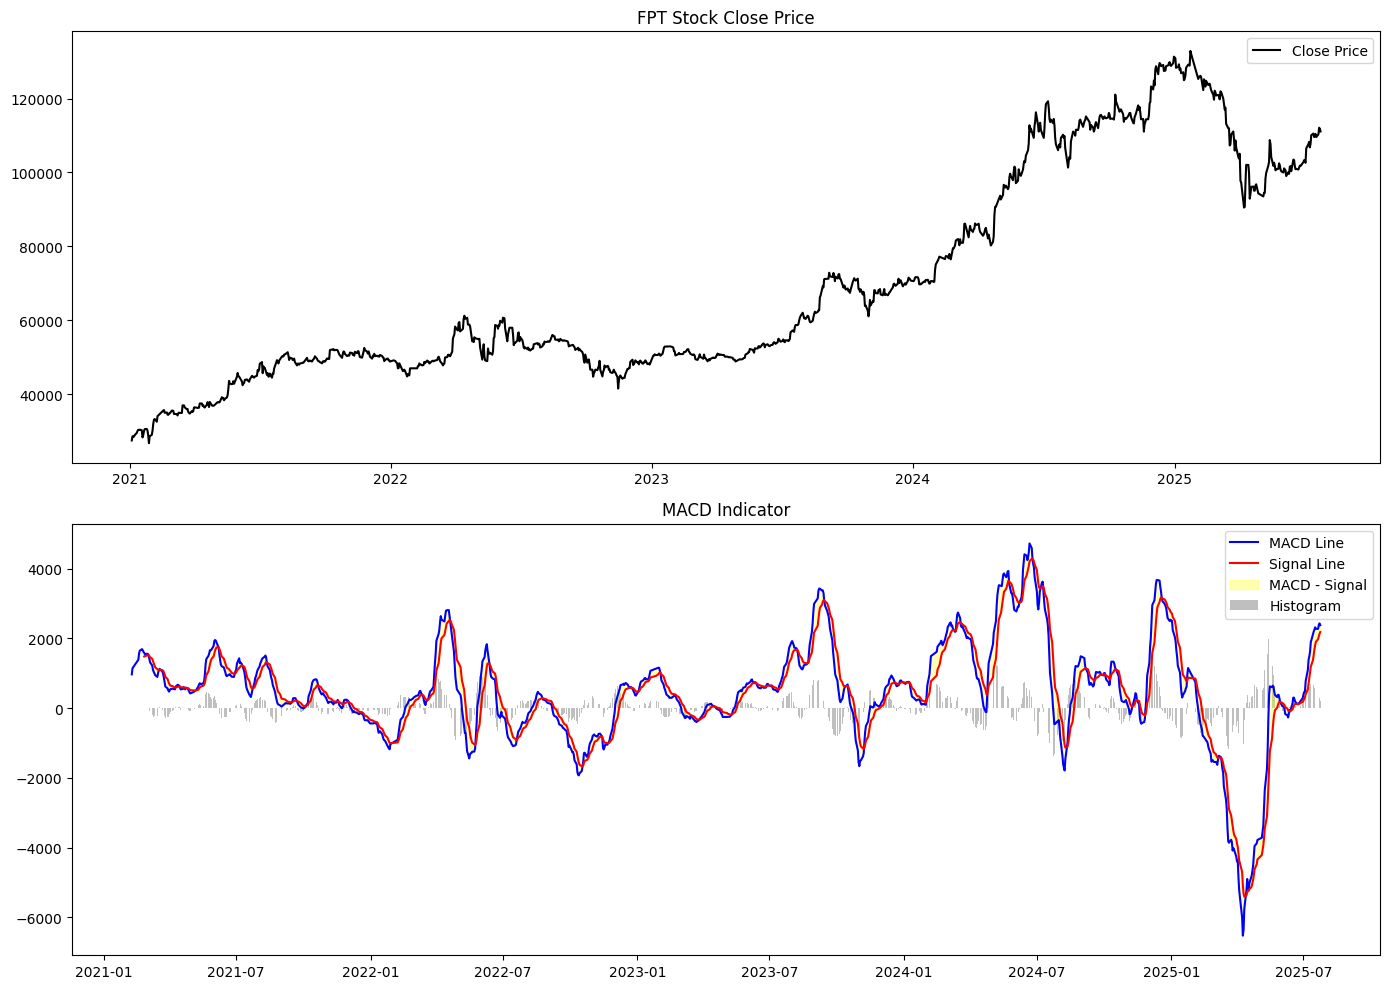

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

# First graph: Close Price
plt.subplot(2,1,1)
plt.plot(fpt['Close'], label='Close Price', color='black')
plt.title('FPT Stock Close Price')
plt.legend()

# Second graph: MACD
plt.subplot(2,1,2)
plt.plot(fpt['MACD'], label='MACD Line', color='blue')
plt.plot(fpt['MACD_Signal'], label='Signal Line', color='red')
plt.bar(fpt.index, fpt['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)
plt.fill_between(fpt.index, fpt['MACD'], fpt['MACD_Signal'], color='yellow', alpha=0.3, label='MACD - Signal')
plt.title('MACD Indicator')
plt.legend()

plt.tight_layout()
plt.show()

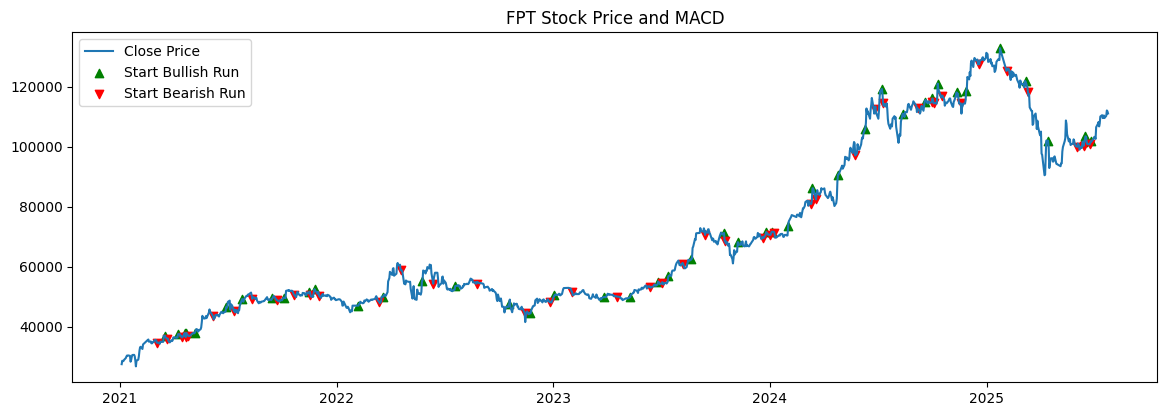

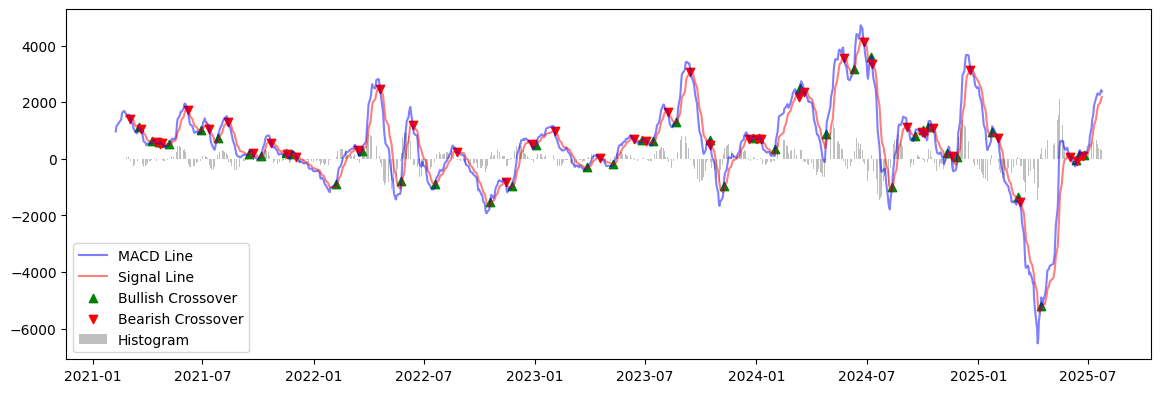

In [9]:
# Identify starting points of bullish and bearish trends
fpt['Bullish_Run_Start'] = (fpt['MACD'] > fpt['MACD_Signal']) & (fpt['MACD'].shift(1) <= fpt['MACD_Signal'].shift(1))
fpt['Bearish_Run_Start'] = (fpt['MACD'] < fpt['MACD_Signal']) & (fpt['MACD'].shift(1) >= fpt['MACD_Signal'].shift(1))

# Plot
plt.figure(figsize=(14, 10))

#Plot Close Price
plt.subplot(2, 1, 1)
plt.plot(fpt['Close'], label='Close Price')
plt.scatter(fpt.index[fpt['Bullish_Run_Start']], fpt['Close'][fpt['Bullish_Run_Start']], marker='^', color='g', label='Start Bullish Run')
plt.scatter(fpt.index[fpt['Bearish_Run_Start']], fpt['Close'][fpt['Bearish_Run_Start']], marker='v', color='r', label='Start Bearish Run')
plt.title('FPT Stock Price and MACD')
plt.legend()


# Identify bullish and bearish crossover points
fpt['Bullish_Crossover'] = (fpt['MACD'] > fpt['MACD_Signal']) & (fpt['MACD'].shift(1) <= fpt['MACD_Signal'].shift(1))
fpt['Bearish_Crossover'] = (fpt['MACD'] < fpt['MACD_Signal']) & (fpt['MACD'].shift(1) >= fpt['MACD_Signal'].shift(1))

# Plot
plt.figure(figsize=(14, 10))

# Plot MACD
plt.subplot(2, 1, 2)
plt.plot(fpt['MACD'], label='MACD Line', color='blue', alpha=0.5)
plt.plot(fpt['MACD_Signal'], label='Signal Line', color='red', alpha=0.5)
plt.bar(fpt.index, fpt['MACD_Diff'], label='Histogram', color='grey', alpha=0.5)

# Markers for bullish and bearish crossover
plt.scatter(fpt.index[fpt['Bullish_Crossover']], fpt['MACD'][fpt['Bullish_Crossover']], marker='^', color='g', label='Bullish Crossover')
plt.scatter(fpt.index[fpt['Bearish_Crossover']], fpt['MACD'][fpt['Bearish_Crossover']], marker='v', color='r', label='Bearish Crossover')

plt.legend()
plt.show()


In [10]:

bullish_dates = fpt.index[fpt['Bullish_Run_Start']].tolist()
bearish_dates = fpt.index[fpt['Bearish_Run_Start']].tolist()


print("Bullish run start dates:", bullish_dates)
print("Bearish run start dates:", bearish_dates)

Bullish run start dates: [Timestamp('2021-03-18 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-20 00:00:00'), Timestamp('2021-04-23 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-06-29 00:00:00'), Timestamp('2021-07-26 00:00:00'), Timestamp('2021-09-15 00:00:00'), Timestamp('2021-10-05 00:00:00'), Timestamp('2021-11-16 00:00:00'), Timestamp('2021-11-25 00:00:00'), Timestamp('2022-02-07 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2022-05-25 00:00:00'), Timestamp('2022-07-20 00:00:00'), Timestamp('2022-10-19 00:00:00'), Timestamp('2022-11-23 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-03-28 00:00:00'), Timestamp('2023-05-10 00:00:00'), Timestamp('2023-06-27 00:00:00'), Timestamp('2023-07-14 00:00:00'), Timestamp('2023-08-22 00:00:00'), Timestamp('2023-10-16 00:00:00'), Timestamp('2023-11-08 00:00:00'), Timestamp('2023-12-26 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-03-13 

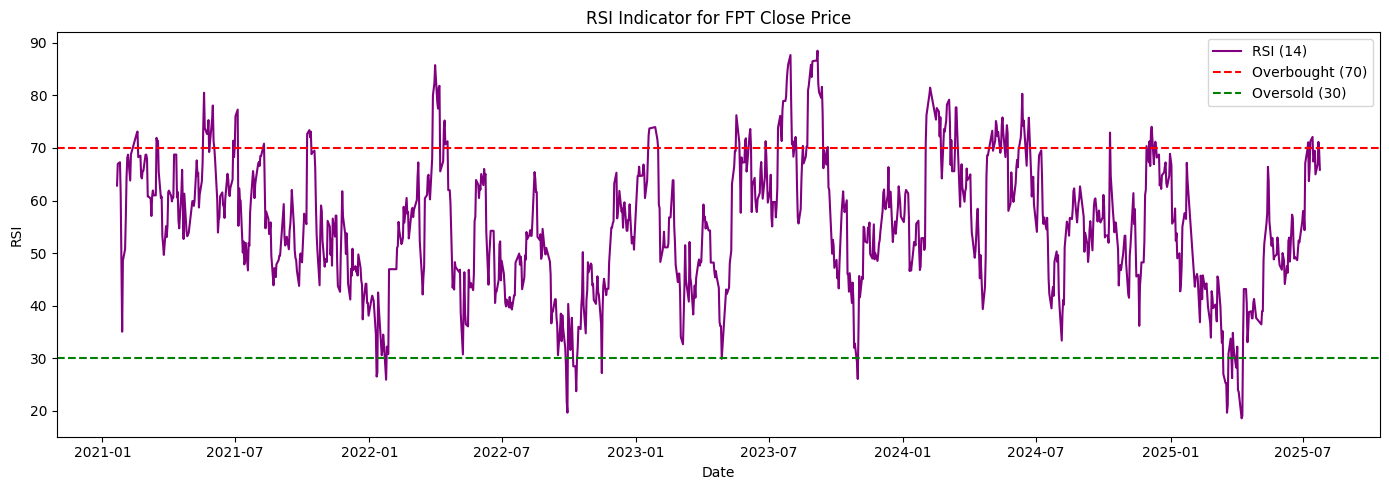

In [11]:
# First ensure you have the TA library installed
# !pip install ta  # Uncomment if needed

# Import required libraries
import pandas as pd
from ta.momentum import RSIIndicator  # Correct import path

# Assuming fpt is your DataFrame with 'Close' prices
close_array = fpt['Close'].values  # Better to use .values than .to_numpy()

# Calculate RSI
# Best approach - use the Series directly

# Convert to Series if needed (usually fpt['Close'] is already a Series)
close_series = fpt['Close'].squeeze() if isinstance(fpt['Close'], pd.DataFrame) else fpt['Close']
# Calculate RSI
fpt['RSI'] = RSIIndicator(close=close_series, window=14).rsi()


# Visualize RSI
plt.figure(figsize=(14,5))
plt.plot(fpt.index, fpt['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI Indicator for FPT Close Price')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
def get_rsi_for_dates(dates, rsi_series):
    """Return a dictionary mapping date string to RSI value for the given dates."""
    return {str(date): rsi_series.loc[date] for date in dates}

bullish_rsi = get_rsi_for_dates(bullish_dates, fpt['RSI'])
bearish_rsi = get_rsi_for_dates(bearish_dates, fpt['RSI'])

print("RSI for bullish run start dates:", bullish_rsi)
print("RSI for bearish run start dates:", bearish_rsi)

RSI for bullish run start dates: {'2021-03-18 00:00:00': np.float64(71.37357289353628), '2021-04-09 00:00:00': np.float64(68.7483415633912), '2021-04-20 00:00:00': np.float64(65.84337108531255), '2021-04-23 00:00:00': np.float64(61.30002817762243), '2021-05-07 00:00:00': np.float64(59.96155618014822), '2021-06-29 00:00:00': np.float64(71.38545762880273), '2021-07-26 00:00:00': np.float64(65.60212526537508), '2021-09-15 00:00:00': np.float64(55.565325561388654), '2021-10-05 00:00:00': np.float64(56.22479288767689), '2021-11-16 00:00:00': np.float64(57.137360534851005), '2021-11-25 00:00:00': np.float64(61.7765305625751), '2022-02-07 00:00:00': np.float64(46.94706559391484), '2022-03-21 00:00:00': np.float64(61.081483145113175), '2022-05-25 00:00:00': np.float64(56.12089485398811), '2022-07-20 00:00:00': np.float64(48.222478412070366), '2022-10-19 00:00:00': np.float64(42.26375769942263), '2022-11-23 00:00:00': np.float64(43.21289367010507), '2023-01-03 00:00:00': np.float64(64.674466566